


# Exploring Weather Trends 


<img src="pics/climatechange.jfif" alt="Climate" style="width: 1000px;"/>


## Udacity: Data Analyst Nanodegree

## Project #1





### Anita Gulyasne Goldpergel
### Aug. 05, 2020.





## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#used_tools">Used Tools</a></li>    
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>    
<li><a href="#weather_trends">Weather Trends</a></li>
<li><a href="#observations">Observations</a></li>
</ul>

<a id='intro'></a>
## Introduction


I live in Hungary, near Budapest. In this project, I will analyze local and global temperature data and compare the Budapest temperature trends to other cities' trends and to overall global temperature trends. I selected my another two favorite cities whose name starts with letter B to compare: Barcelona and Berlin. The database was provided by Udacity. I need to extract, manipulate, examine, and visualize the data. 

### Budapest
<img src="pics/budapest.jfif" alt="Budapest" style="width: 800px;"/>

### Barcelona
<img src="pics/barcelona.jfif" alt="Barcelona" style="width: 800px;"/>

### Berlin
<img src="pics/berlin.jfif" alt="Berlin" style="width: 800px;"/>



In [99]:
# import statements 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# visualizations should be plotted in the notebook
%matplotlib inline

<a id='used_tools'></a>
## Used Tools

I used SQL to extract the data, and Python, Jupyter notebook for manipulate and analyze them.

<a id='wrangling'></a>
## Data Wrangling

I extracted the data from Udacity site with the following sql.

### Let's check first which cities are available from Hungary
SELECT * FROM city_list WHERE country = 'Hungary'

### Only Budapest available, so get Budapest data -> I saved the result as 'budapest_weather.csv'
SELECT * FROM city_data WHERE country = 'Hungary' AND city = 'Budapest'

### Get global data  -> I saved the result as 'global_weather.csv'
SELECT * FROM global_data

### Get another city data
### Let's check cities and countries first
SELECT * FROM city_list

### Get Barcelona data -> I saved the result as 'barcelona_weather.csv'
SELECT * FROM city_data WHERE country = 'Spain' AND city = 'Barcelona'

### Get Berlin data -> I saved the result as 'berlin_weather.csv'
SELECT * FROM city_data WHERE country = 'Germany' AND city = 'Berlin'


In [100]:
# simple function to examine the datasets
# it prints the first and last 'count' number of rows of the dataset, the info and the describe
def print_data(data, count):
    print(data.head(count))
    print(data.tail(count), '\n')
    print(data.info(), '\n')
    print(data.describe(), '\n\n')

In [101]:
# load global data 
global_weather = pd.read_csv('data/global_weather.csv')
print_data(global_weather, 10)

   year  avg_temp
0  1750      8.72
1  1751      7.98
2  1752      5.78
3  1753      8.39
4  1754      8.47
5  1755      8.36
6  1756      8.85
7  1757      9.02
8  1758      6.74
9  1759      7.99
     year  avg_temp
256  2006      9.53
257  2007      9.73
258  2008      9.43
259  2009      9.51
260  2010      9.70
261  2011      9.52
262  2012      9.51
263  2013      9.61
264  2014      9.57
265  2015      9.83 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 2 columns):
year        266 non-null int64
avg_temp    266 non-null float64
dtypes: float64(1), int64(1)
memory usage: 4.3 KB
None 

              year    avg_temp
count   266.000000  266.000000
mean   1882.500000    8.369474
std      76.931788    0.584747
min    1750.000000    5.780000
25%    1816.250000    8.082500
50%    1882.500000    8.375000
75%    1948.750000    8.707500
max    2015.000000    9.830000 




In [102]:
# load the cities data to compare
# load Barcelona, Berlin and Budapest data and examine them

datafiles = ['data/barcelona_weather.csv', 'data/berlin_weather.csv', 'data/budapest_weather.csv']
cities = []

for index, data in enumerate(datafiles):
    cities.append(pd.read_csv(data))
    print_data(cities[index], 10)


   year       city country  avg_temp
0  1743  Barcelona   Spain     13.81
1  1744  Barcelona   Spain     16.98
2  1745  Barcelona   Spain     10.78
3  1746  Barcelona   Spain       NaN
4  1747  Barcelona   Spain       NaN
5  1748  Barcelona   Spain       NaN
6  1749  Barcelona   Spain       NaN
7  1750  Barcelona   Spain     16.52
8  1751  Barcelona   Spain     16.78
9  1752  Barcelona   Spain     13.09
     year       city country  avg_temp
261  2004  Barcelona   Spain     17.12
262  2005  Barcelona   Spain     16.69
263  2006  Barcelona   Spain     17.81
264  2007  Barcelona   Spain     17.24
265  2008  Barcelona   Spain     16.92
266  2009  Barcelona   Spain     17.45
267  2010  Barcelona   Spain     16.51
268  2011  Barcelona   Spain     17.90
269  2012  Barcelona   Spain     17.51
270  2013  Barcelona   Spain     17.00 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 4 columns):
year        271 non-null int64
city        271 non-null ob

<a id='cleaning'></a>
## Data Cleaning


As we can see previously, the global and the cities' data has not the same date range. I remove the missing values and ensure the same date range in every dataset.  

#### Global data

The global data starts from 1750 until 2015. It doesn't have any missing values. It contains 266 non-missing values. 

#### Cities data

All the cities' data (Budapest, Berlin, Barcelona) are very similar. They have the same range: starts from 1743 until 2013 which is broader than the global data. All of them have 271 values, 4 missings, and 267 non-missing values. The missing values are in the same rows: from 1746 to 1749.

#### Conclusion
So we will use the following range: from 1750 until 2013 to eliminate the missing values.

In [103]:
# clean global data
global_clean = global_weather.loc[:263,]

print_data(global_clean, 10)

   year  avg_temp
0  1750      8.72
1  1751      7.98
2  1752      5.78
3  1753      8.39
4  1754      8.47
5  1755      8.36
6  1756      8.85
7  1757      9.02
8  1758      6.74
9  1759      7.99
     year  avg_temp
254  2004      9.32
255  2005      9.70
256  2006      9.53
257  2007      9.73
258  2008      9.43
259  2009      9.51
260  2010      9.70
261  2011      9.52
262  2012      9.51
263  2013      9.61 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 2 columns):
year        264 non-null int64
avg_temp    264 non-null float64
dtypes: float64(1), int64(1)
memory usage: 4.2 KB
None 

              year    avg_temp
count   264.000000  264.000000
mean   1881.500000    8.359394
std      76.354437    0.575184
min    1750.000000    5.780000
25%    1815.750000    8.077500
50%    1881.500000    8.365000
75%    1947.250000    8.700000
max    2013.000000    9.730000 




In [104]:
# clean cities data
clean_cities = []
    
for citi in cities:
    clean = citi.loc[7:,['year','avg_temp']]
    print_data(clean, 10)
    clean_cities.append(clean)

    year  avg_temp
7   1750     16.52
8   1751     16.78
9   1752     13.09
10  1753     16.17
11  1754     16.09
12  1755     15.80
13  1756     16.11
14  1757     15.88
15  1758     15.04
16  1759     16.19
     year  avg_temp
261  2004     17.12
262  2005     16.69
263  2006     17.81
264  2007     17.24
265  2008     16.92
266  2009     17.45
267  2010     16.51
268  2011     17.90
269  2012     17.51
270  2013     17.00 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 7 to 270
Data columns (total 2 columns):
year        264 non-null int64
avg_temp    264 non-null float64
dtypes: float64(1), int64(1)
memory usage: 4.3 KB
None 

              year    avg_temp
count   264.000000  264.000000
mean   1881.500000   16.141780
std      76.354437    0.592889
min    1750.000000   13.090000
25%    1815.750000   15.830000
50%    1881.500000   16.095000
75%    1947.250000   16.470000
max    2013.000000   17.900000 


    year  avg_temp
7   1750      9.83
8   1751      9.75
9   1

In [105]:
# append the global data to the end
clean_cities.append(global_clean)

<a id='weather_trends'></a>
## Weather Trends

To see the weather trends I will calculate moving averages. Moving averages are used to smooth out data to make it easier to observe long term trends and not get lost in daily fluctuations.

### Question 1: How many years should we take the moving average?
I will examine the 10, 50 and 100 year moving averages.

In [106]:
# calculate the moving average
def moving_avg(window, data):
    return data.rolling(window = window, center = False).mean()


In [107]:
#print(plt.style.available)

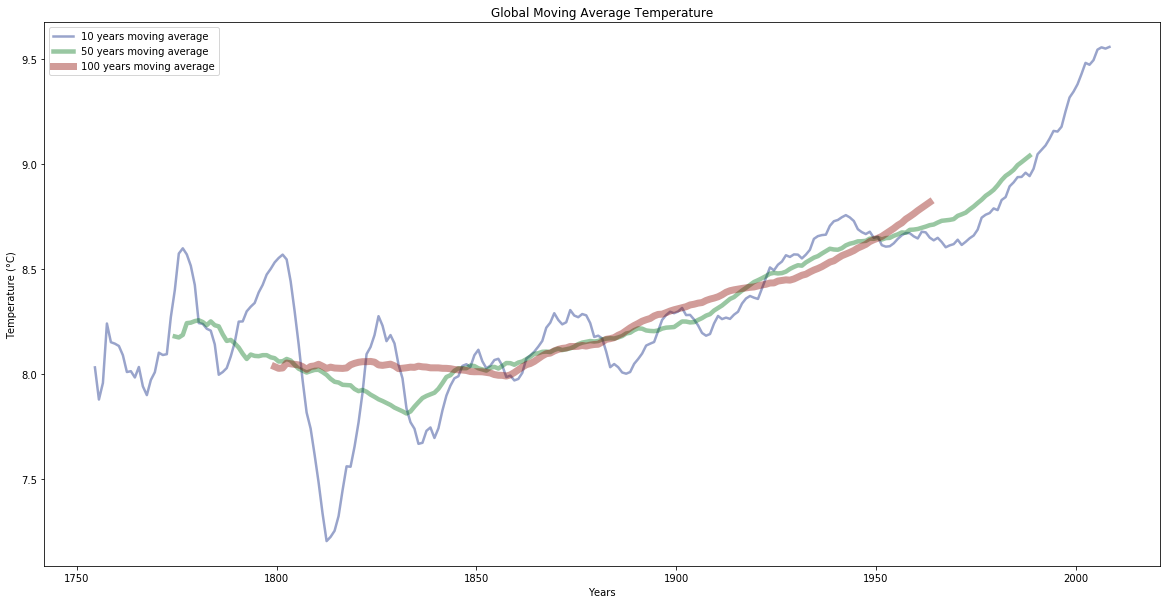

In [108]:
# Draw the weather graphs
windows = [10, 50, 100]

plt.figure(figsize=(20,10))

plt.style.use('seaborn-dark-palette')

for window in windows:
    global_mavg = moving_avg(window, global_clean)  

    plt.plot(global_mavg['year'], global_mavg['avg_temp'], label=str(window)+' years moving average', linewidth=2+window/20, alpha=0.4)

    plt.xlabel("Years")
    plt.ylabel("Temperature (°C)")
    plt.title("Global Moving Average Temperature")
    plt.legend(loc='upper left')
plt.show()

### Conclusion:
The 10-year average graph is too volatile. We can see clearly the trend in the 50-year or the 100-year graph. I choose 50 years, because we have more data points, don't want to lose too much data. 

### Compare the graphs with other cities and the global average

In [109]:
# examine basic statistics for the 4 cleaned data
for clean_citi in clean_cities:
    print(clean_citi.describe())

              year    avg_temp
count   264.000000  264.000000
mean   1881.500000   16.141780
std      76.354437    0.592889
min    1750.000000   13.090000
25%    1815.750000   15.830000
50%    1881.500000   16.095000
75%    1947.250000   16.470000
max    2013.000000   17.900000
              year    avg_temp
count   264.000000  264.000000
mean   1881.500000    8.917727
std      76.354437    0.883601
min    1750.000000    4.840000
25%    1815.750000    8.357500
50%    1881.500000    8.935000
75%    1947.250000    9.485000
max    2013.000000   10.960000
              year    avg_temp
count   264.000000  264.000000
mean   1881.500000    9.771932
std      76.354437    0.830466
min    1750.000000    4.740000
25%    1815.750000    9.287500
50%    1881.500000    9.770000
75%    1947.250000   10.310000
max    2013.000000   12.440000
              year    avg_temp
count   264.000000  264.000000
mean   1881.500000    8.359394
std      76.354437    0.575184
min    1750.000000    5.780000
25%    1

Barcelona
   year  avg_temp
7   NaN       NaN
8   NaN       NaN
9   NaN       NaN
       year  avg_temp
268  1986.5   16.6662
269  1987.5   16.6946
270  1988.5   16.7192 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 7 to 270
Data columns (total 2 columns):
year        215 non-null float64
avg_temp    215 non-null float64
dtypes: float64(2)
memory usage: 4.3 KB
None 

              year    avg_temp
count   215.000000  215.000000
mean   1881.500000   16.063224
std      62.209324    0.214840
min    1774.500000   15.798600
25%    1828.000000   15.901200
50%    1881.500000   15.977000
75%    1935.000000   16.199200
max    1988.500000   16.719200 


Berlin
   year  avg_temp
7   NaN       NaN
8   NaN       NaN
9   NaN       NaN
       year  avg_temp
268  1986.5    9.5136
269  1987.5    9.5502
270  1988.5    9.5902 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 7 to 270
Data columns (total 2 columns):
year        215 non-null float64
avg_temp    215 non-nul

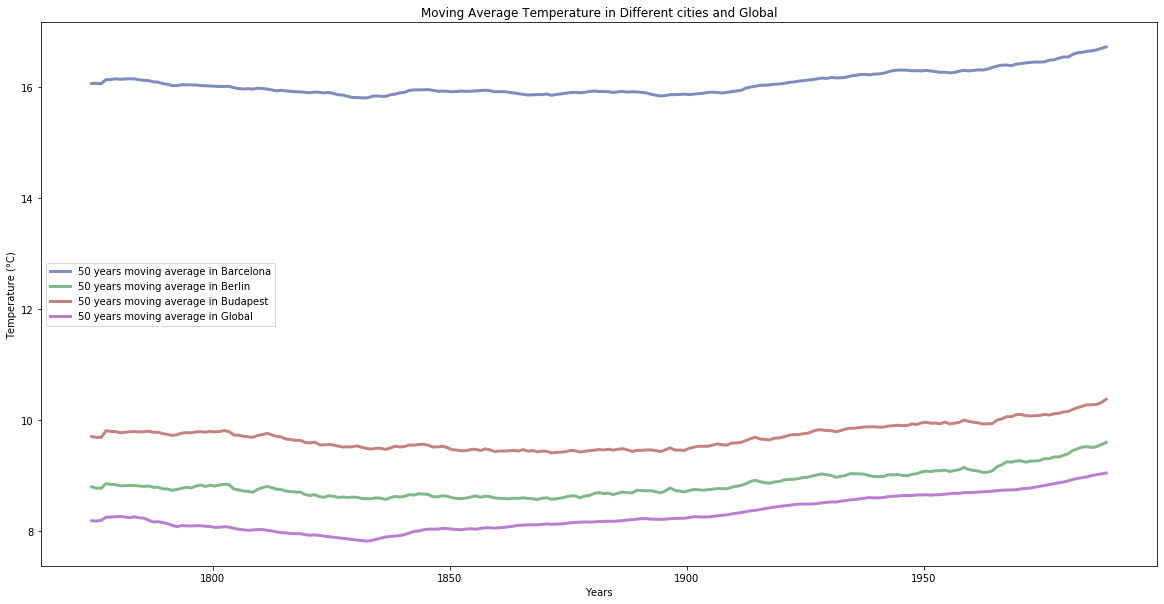

In [110]:
# Examine the moving averages in the 4 dataset
# and draw the weather graphs
window = 50
dataset_names = ['Barcelona', 'Berlin', 'Budapest', 'Global']

moving_averages = pd.DataFrame()
plt.figure(figsize=(20,10))

plt.style.use('seaborn-dark-palette')

for i, data in enumerate(clean_cities):
    moving_average = moving_avg(window, data) 
    pd.concat([moving_averages, moving_average],axis=1)

    plt.plot(moving_average['year'], moving_average['avg_temp'], label=str(window)+' years moving average in '+dataset_names[i], linewidth=3, alpha=0.5)

    plt.xlabel("Years")
    plt.ylabel("Temperature (°C)")
    plt.title("Moving Average Temperature in Different cities and Global")
    plt.legend(loc='center left')
    print(dataset_names[i])
    print_data(moving_average, 3)

plt.show()

<a id='observations'></a>
## Observations

Barcelona, Berlin, Budapest, all of them **warmer on average** then the world global average.

The difference is quite consistent over time. 
    - Berlin is warmer than the global average appr. with 0.6 Celsius. 
    - Budapest is warmer than the global average appr. with 1.4 Celsius. 
    - Barcelona is warmer than the global average appr. with 7.8 Celsius. 

This results that the 4 curve more or less parallel.

The global average temperature became higher with 1.2 Celsius in average in this 210 years, so appr. 0.6 Celsius per 100 years.
The trend is clear in every curve: it is getting warmer with 0.5-0.6 Celsius per 100 years in every examined city.
